In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_json('yelp_academic_dataset_business.json',lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [4]:
df.shape

(192609, 14)

In [5]:
df['restaurants'] = df['categories'].str.contains('Restaurants')
df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurants
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,False
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True


In [6]:
dfRestaurants = df.loc[df.restaurants == True]
dfRestaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurants
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True


In [7]:
dfRestaurants.shape

(59371, 15)

In [8]:
dfRestaurants['stars'].unique()

array([2.5, 4. , 3. , 4.5, 3.5, 2. , 5. , 1.5, 1. ])

C:\Users\Farida\AppData\Local\Temp\ipykernel_8576\2121428899.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




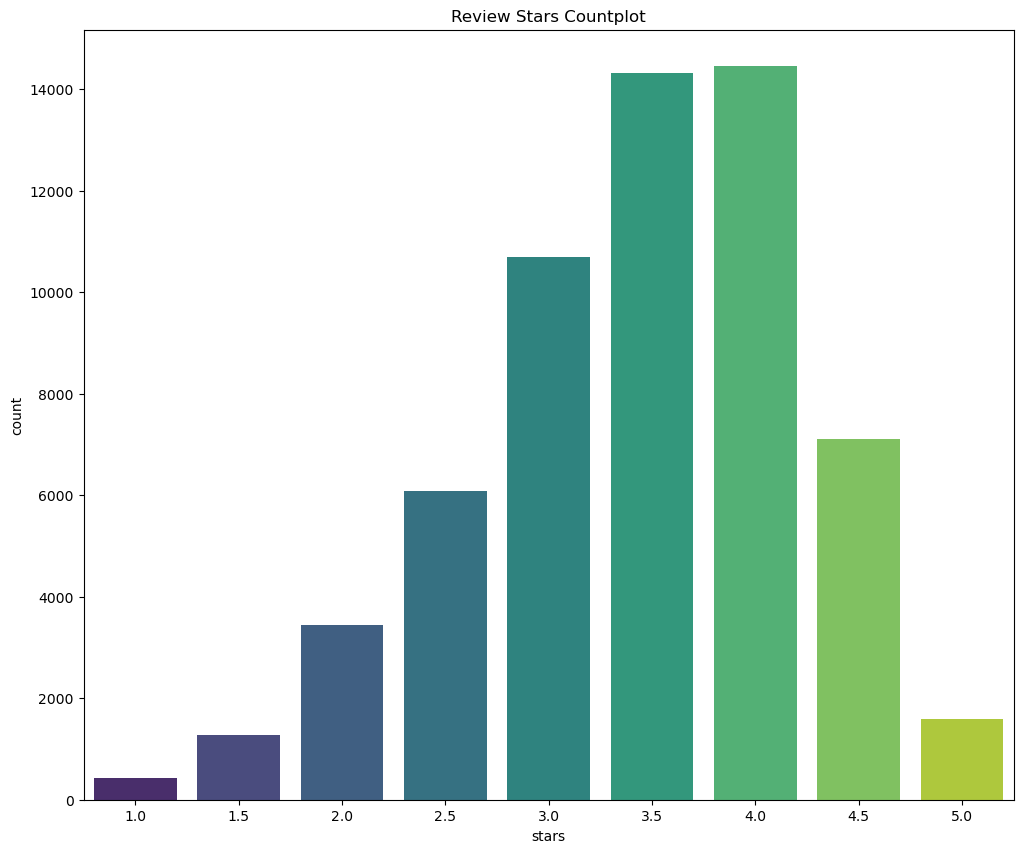

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='stars', data=dfRestaurants, ax=ax, palette='viridis')
plt.title('Review Stars Countplot')
plt.show()

In [10]:
topRestaurants = dfRestaurants.sort_values(by=['review_count','stars'],ascending=False)[:20]
topRestaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurants
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True


C:\Users\Farida\AppData\Local\Temp\ipykernel_8576\946126753.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Farida\AppData\Local\Temp\ipykernel_8576\946126753.py:4: UserWarning:


The palette list has fewer values (9) than needed (20) and will cycle, which may produce an uninterpretable plot.



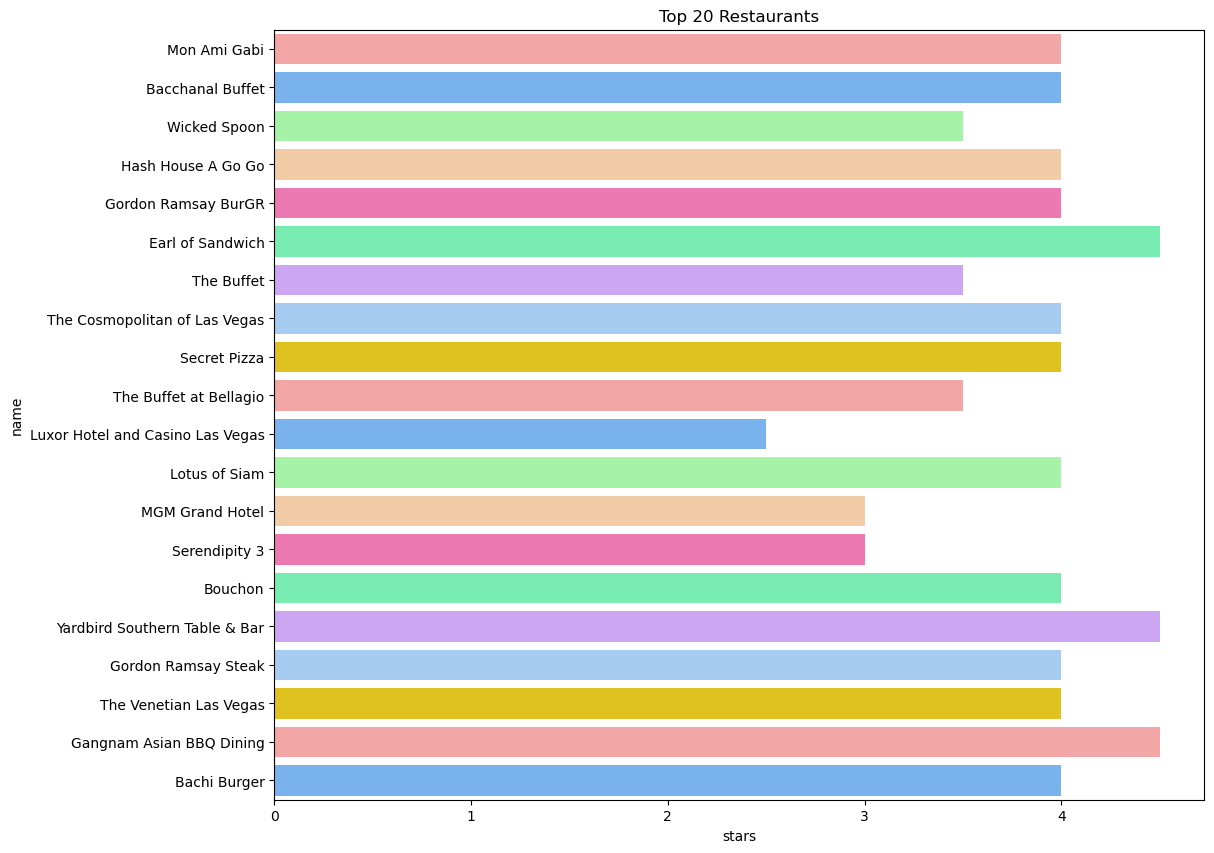

In [14]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66B2', '#66FFB2', '#CC99FF', '#99CCFF', '#FFD700']

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='stars', y='name', data=topRestaurants, ax=ax, palette=custom_colors)
plt.title('Top 20 Restaurants')
plt.show()

In [20]:
lasVegas = dfRestaurants[dfRestaurants.state == 'NV']
lasVegas

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurants
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",True
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",None,True
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,None,"Restaurants, Chinese",None,True
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192458,P8uECqGqXWTwEndkh-6bQw,Naked City Pizza Shop,3240 S Arville St,Las Vegas,NV,89102,36.130804,-115.198971,4.0,576,1,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Pizza, Chicken Wings, Italian, Res...","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",True
192475,p5rpYtxS5xPQjt3MXYVEwA,Greens and Proteins,"8975 S Eastern Ave, Ste 3C",Las Vegas,NV,89123,36.026212,-115.119341,4.0,704,1,"{'Alcohol': 'u'none'', 'BusinessParking': '{'g...","Sandwiches, Cafes, Pizza, Vegetarian, Gluten-F...","{'Monday': '9:30-19:30', 'Tuesday': '7:0-22:0'...",True
192507,3L4VPQXH3ni8IsuJLnd74g,Marco's Pizza,7540 Oso Blanca Rd,Las Vegas,NV,89149,36.296746,-115.288481,3.5,24,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Restaurants, Pizza","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",True
192517,ckc3l8cSuggloG4NlquEFQ,Great Steak & Potato,755 S Grand Central Pkwy,Las Vegas,NV,89106,36.164316,-115.157446,2.0,5,0,"{'NoiseLevel': 'u'loud'', 'Caters': 'False', '...","Restaurants, Fast Food",None,True


In [23]:
coords = lasVegas[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    KmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

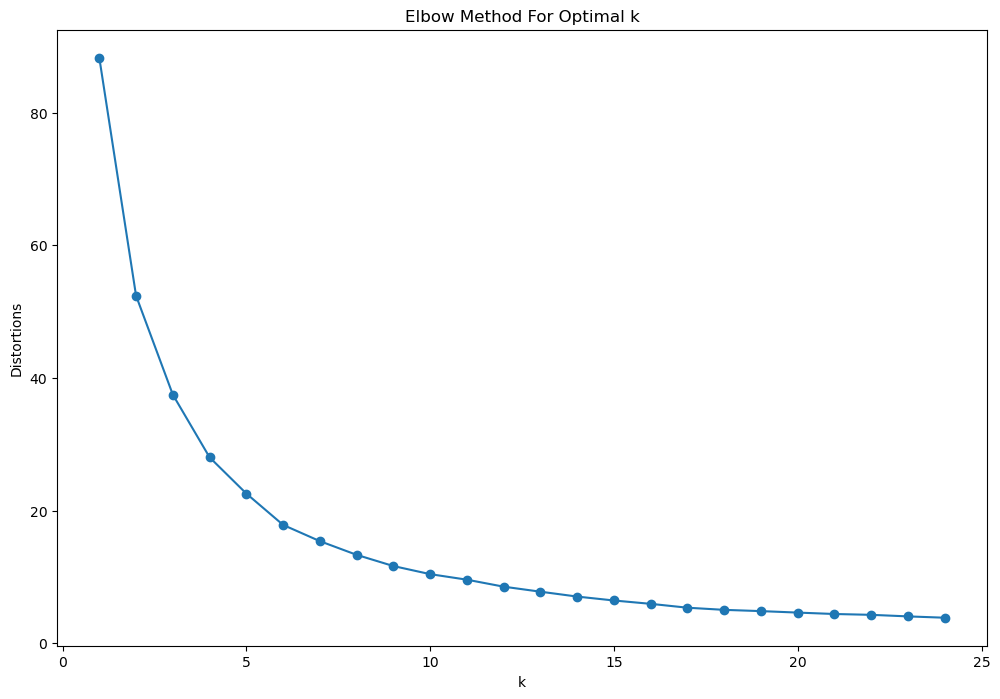

In [24]:
fig , ax = plt.subplots(figsize=(12,8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
sil = []
kmax = 50

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric='euclidean'))

sil

[0.38509735838622017,
 0.3668559840008646,
 0.39235863947853006,
 0.38912213445190724,
 0.41067536413005756,
 0.4182967029343388,
 0.42570299130494904,
 0.4048701260113688,
 0.40684029490060647,
 0.4176123805663866,
 0.4289211913163969,
 0.42255110173467775,
 0.4301336386571069,
 0.431902942724831,
 0.4412912709468522,
 0.445616621576715,
 0.4283705648263691,
 0.4447034895823294,
 0.44232446675234716,
 0.4403329893050973,
 0.4343076689631481,
 0.4349668512589955,
 0.4236918817994227,
 0.4411446971355676,
 0.42884023640094115,
 0.4468912806262015,
 0.43502611889278725,
 0.4347883175740755,
 0.4446160486403835,
 0.43891200618191073,
 0.4371502090050405,
 0.4327547008401686,
 0.43507387224912847,
 0.4299851250712219,
 0.42793672271125843,
 0.43280095898159626,
 0.4295100151215613,
 0.43130400407193675,
 0.4385760940067494,
 0.45048653602825084,
 0.4545978083106395,
 0.43884860976015594,
 0.44340296851827066,
 0.44668089539724937,
 0.4537537214372757,
 0.44530000704842915,
 0.4447666849203

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5"," silhouette_score ",silhouette_score(coords, y, metric='euclidean'))

k = 5  silhouette_score  0.38899465562409596


In [29]:
lasVegas['cluster'] = kmeans.predict(lasVegas[['longitude','latitude']])
lasVegas.head()

C:\Users\Farida\AppData\Local\Temp\ipykernel_8576\403706406.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurants,cluster
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True,0
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",True,4
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,6125 Spring Mountain Rd,Las Vegas,NV,89146,36.125031,-115.225620,2.0,33,0,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...","Fast Food, Food, Restaurants, Ice Cream & Froz...",None,True,0
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,4343 N Rancho Dr,Las Vegas,NV,89030,36.238596,-115.233331,2.0,4,1,None,"Restaurants, Chinese",None,True,2
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Artisan Hotel, 1501 W Sahara Ave",Las Vegas,NV,89102,36.143672,-115.169792,2.0,3,0,"{'RestaurantsAttire': ''dressy'', 'Corkage': '...","Restaurants, Pizza, Italian, American (New)","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True,0


In [30]:
topRestaurantLasVegas = lasVegas.sort_values(by=['review_count','stars'], ascending=False)
topRestaurantLasVegas.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurants,cluster
82250,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,8348,1,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...","Food, French, Breakfast & Brunch, Restaurants,...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True,0
89206,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.116113,-115.176222,4.0,8339,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Buffets, Sandwiches, Food, Breakf...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",True,0
35199,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109550,-115.176155,3.5,6708,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Buffets, Breakfast & Brunch, Restaurants","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",True,0
58852,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,5763,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Food, Restaurants, America...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,0
141820,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.110724,-115.172169,4.0,5484,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Burgers, American (Traditional)","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True,0


In [33]:
def recommendRestaurants(df, longitude, latitude):
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
    return df[df['cluster']==cluster].iloc[0:5][['name','latitude','longitude']]

In [34]:
recommendRestaurants(topRestaurantLasVegas,-115.1891691, 36.1017316)

0


C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
82250,Mon Ami Gabi,36.112859,-115.172434
89206,Bacchanal Buffet,36.116113,-115.176222
35199,Wicked Spoon,36.109550,-115.176155
58852,Hash House A Go Go,36.118181,-115.171580
141820,Gordon Ramsay BurGR,36.110724,-115.172169


In [39]:
testCoordinates = {
    'user': [1,2,3],
    'latitude':[36.1017316, 36.0842838, 36.155011],
    'longitude':[-115.1891691, -115.2798544, -115.082821]
}

testDF = pd.DataFrame(testCoordinates)
testDF

,user,latitude,longitude
0,1,36.101732,-115.189169
1,2,36.084284,-115.279854
2,3,36.155011,-115.082821


In [40]:
user1 = testDF[testDF['user'] == 1]
user1

,user,latitude,longitude
0,1,36.101732,-115.189169


In [42]:
recommendRestaurants(topRestaurantLasVegas,user1.longitude, user1.latitude)

0


C:\Users\Farida\anaconda3\envs\Tsflow\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
82250,Mon Ami Gabi,36.112859,-115.172434
89206,Bacchanal Buffet,36.116113,-115.176222
35199,Wicked Spoon,36.109550,-115.176155
58852,Hash House A Go Go,36.118181,-115.171580
141820,Gordon Ramsay BurGR,36.110724,-115.172169
